In [1]:
import numpy as np
from analysistools import *

Note: wide gap (Delta>0.15), 2.shallow gap (Delta<0.15)
The linear fitting method only applies to wide gaps

In [2]:
# These are for DSHARP disks
diskname = "AS209"
fileaddress = f"https://almascience.eso.org/almadata/lp/DSHARP/profiles/{diskname}.profile.txt"
radialprofile = np.genfromtxt(fileaddress).T

gaprad = 8.69
ringrad = 14.2
innerlimit = 0
outerlimit = 24
rout_rin, rout = measure_widths(gaprad, ringrad,
                                radialprofile[0], radialprofile[2], 
                                innerlimit, outerlimit)
Delta = rout_rin/rout
print (f"{diskname} width = {Delta:1.2f}")

AS209 width = 0.42


In [3]:
# These are for DSHARP disks
diskname = "AS209"
fileaddress = f"https://almascience.eso.org/almadata/lp/DSHARP/profiles/{diskname}.profile.txt"
radialprofile = np.genfromtxt(fileaddress).T

gaprad = 96.7
ringrad = 120.3
innerlimit = 0
outerlimit = 130
rout_rin, rout = measure_widths(gaprad, ringrad,
                                radialprofile[0], radialprofile[2], 
                                innerlimit, outerlimit)
Delta = rout_rin/rout
print (f"{diskname} width = {Delta:1.2f}")

AS209 width = 0.31


In [4]:
# These are for DSHARP disks
diskname = "GWLup"
fileaddress = f"https://almascience.eso.org/almadata/lp/DSHARP/profiles/{diskname}.profile.txt"
radialprofile = np.genfromtxt(fileaddress).T

gaprad = 74.3
ringrad = 85.4
innerlimit = 0
outerlimit = 100
rout_rin, rout = measure_widths(gaprad, ringrad,
                                radialprofile[0], radialprofile[2], 
                                innerlimit, outerlimit)
Delta = rout_rin/rout
print (f"{diskname} width = {Delta:1.2f}")

GWLup width = 0.15


In [5]:
# These are for DSHARP disks
diskname = "Elias24"
fileaddress = f"https://almascience.eso.org/almadata/lp/DSHARP/profiles/{diskname}.profile.txt"
radialprofile = np.genfromtxt(fileaddress).T

gaprad = 56.8
ringrad = 76.7
innerlimit = 0
outerlimit = 100
rout_rin, rout = measure_widths(gaprad, ringrad,
                                radialprofile[0], radialprofile[2], 
                                innerlimit, outerlimit)
Delta = rout_rin/rout
print (f"width = {Delta:1.2f}")

width = 0.32


Another way to find gap width quickly

rin = 47.9 au; rout = 70.7 au
width = 0.322


Text(0, 0.5, 'I [mJy/beam]')

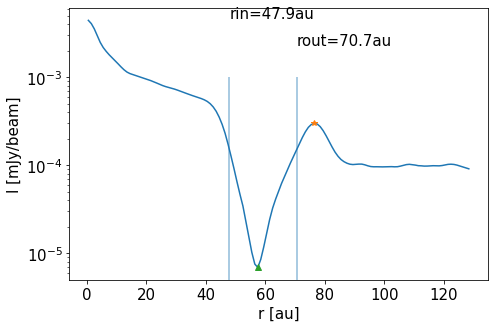

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d, UnivariateSpline

r, intensity, err = radialprofile[[0,2,3]]
prominence = 0.05
rightbound = 129# AU
intensity = intensity[r < rightbound]
err       = err[r < rightbound]
r         = r[r < rightbound]

prominence = prominence * np.mean(intensity)

dips_idx = find_peaks(-intensity, prominence= prominence)[0]
peaks_idx = find_peaks(intensity, prominence= prominence)[0]
extrema_idx = np.append(peaks_idx, dips_idx)
extrema_idx.sort()

I_half = (intensity[extrema_idx][-1] + intensity[extrema_idx][-2]) / 2.
I_r = UnivariateSpline(r, intensity - I_half, s=0)
edges = I_r.roots()
edges = edges[(edges <  r[extrema_idx][-1])]
rin   = edges[-2]
rout  = edges[-1]
width = (rout-rin)/rout

plt.rc("font", size=15)
plt.figure(figsize=(7.5, 5))
plt.plot(r, intensity)
plt.plot(r[peaks_idx], intensity[peaks_idx], "*")
plt.plot(r[dips_idx], intensity[dips_idx], "^")
plt.vlines(edges, 0, 2*np.mean(intensity), alpha = 0.5)

ylim = plt.ylim()
plt.text(rin, ylim[1], f'rin={rin:3.1f}au')
plt.text(rout, ylim[1]/2, f'rout={rout:3.1f}au')


print (f"rin = {rin:3.1f} au;", f"rout = {rout:3.1f} au")
print (f"width = {width:3.3f}")

plt.semilogy()
plt.xlabel("r [au]")
plt.ylabel("I [mJy/beam]")